# K Means Clustering

### Question: Write a program to perform unsupervised K Means Clustering on  Iris Dataset

## 1. Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import matplotlib as mpl
import warnings

## 2. Importing and visualizing Iris dataset

In [2]:
iris_data = pd.read_csv("Iris.csv", index_col=0)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


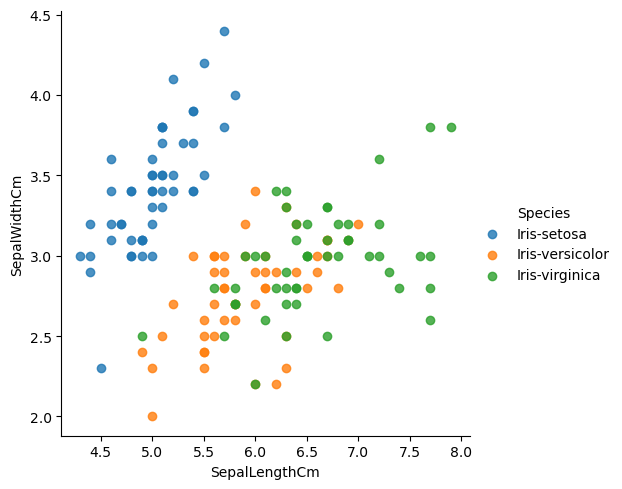

In [3]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_data, hue="Species", fit_reg=False);

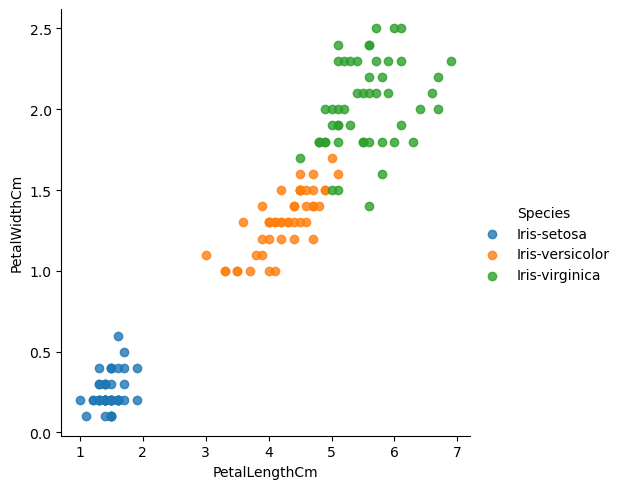

In [4]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_data, hue="Species", fit_reg=False);

In [5]:
iris_species_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
warnings.filterwarnings("ignore")
for i in range(1, len(iris_data["Species"])+1):
    iris_data["Species"][i] = iris_species_map[iris_data["Species"][i]]
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


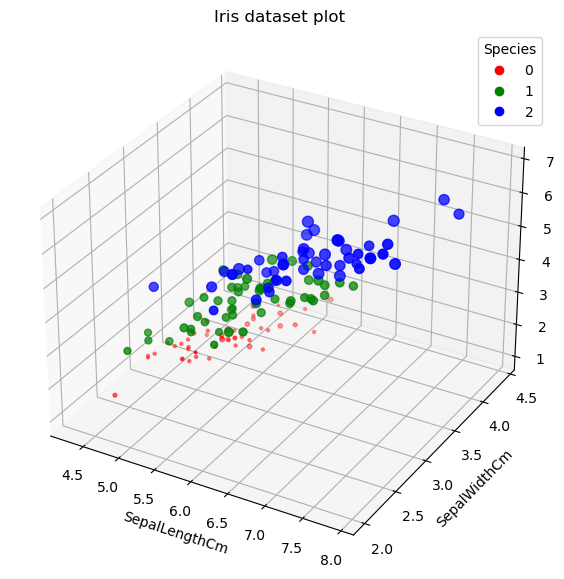

In [6]:
x_axis = np.array(iris_data["SepalLengthCm"])
y_axis = np.array(iris_data["SepalWidthCm"])
z_axis = np.array(iris_data["PetalLengthCm"])
s = np.array(iris_data["PetalWidthCm"])
labels = np.array(iris_data["Species"])
colors = ["red", "green", "blue"]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
scatter = ax.scatter3D(x_axis, y_axis, z_axis, s=s*100, c=labels, cmap=mpl.colors.ListedColormap(colors), marker=".")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Species")
plt.title("Iris dataset plot")
plt.show()

## 3. K Means Clustering Class with algorithm

In [7]:
class K_Means:
    def __init__(self, k, max_iter=1000):
        self.k = k
        self.max_iter = max_iter
        self.clusters = { i:[] for i in range(self.k) }
        
    def calculate_distance(self, x, y):
        dim = len(x)
        dist = 0
        for i in range(dim):
            dist += (x[i] - y[i]) ** 2
        return dist ** 1/2
    
    def fit(self, iris_data):
        # Conversion into numpy array (for easy distance calculation)
        X = iris_data.drop("Species", axis=1)
        X = np.array(X)
        
        # Phase 1: Random selection of centroids
        centroid_idx = []
        for _ in range(self.k):
            idx = np.random.choice(range(len(X)))
            while idx in centroid_idx:
                idx = np.random.choice(range(len(X)))
            centroid_idx.append(idx)
        centroids = [X[i] for i in centroid_idx]
        for i in range(self.k):
            self.clusters[i].append(centroids[i])
        
        # Phase 2: Calculate distance from each centroid and assign clusters and change the centroids for each addition
        for i in range(len(X)):
            min_centroid = 0
            min_dist = np.inf
            for j in range(self.k):
                distance = self.calculate_distance(X[i], centroids[j])
                if distance < min_dist:
                    min_centroid = j
                    min_dist = distance
            self.clusters[min_centroid].append(X[i])
            temp = np.array(self.clusters[min_centroid])
            centroids[min_centroid] = temp.mean(axis=0)
            
        # Phase 3: Assign sample points to clusters
        self.clusters = { i:[] for i in range(self.k) }
        for i in range(len(X)):
            min_centroid = 0
            min_dist = np.inf
            for j in range(self.k):
                distance = self.calculate_distance(X[i], centroids[j])
                if distance < min_dist:
                    min_centroid = j
                    min_dist = distance
            self.clusters[min_centroid].append(X[i])
            
        return (centroids, self.clusters)

In [8]:
kmeans = K_Means(3)
centroids, clusters = kmeans.fit(iris_data)
for i in range(3):
    centroids[i] = np.append(centroids[i], i)
for i in clusters.keys():
    for j in range(len(clusters[i])):
        clusters[i][j] = np.append(clusters[i][j], i)

In [9]:
centroid_df = pd.DataFrame(data=centroids, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
centroid_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.001961,3.417647,1.472549,0.243137,0.0
1,5.940323,2.759677,4.396774,1.424194,1.0
2,6.760000,3.037500,5.730000,2.070000,2.0


In [10]:
class_0_df = pd.DataFrame(data=clusters[0], columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
class_0_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [11]:
class_1_df = pd.DataFrame(data=clusters[1], columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
class_1_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,1.0
1,6.4,3.2,4.5,1.5,1.0
2,5.5,2.3,4.0,1.3,1.0
3,6.5,2.8,4.6,1.5,1.0
4,5.7,2.8,4.5,1.3,1.0
...,...,...,...,...,...
57,6.3,2.8,5.1,1.5,1.0
58,6.0,3.0,4.8,1.8,1.0
59,5.8,2.7,5.1,1.9,1.0
60,6.3,2.5,5.0,1.9,1.0


In [12]:
class_2_df = pd.DataFrame(data=clusters[2], columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
class_2_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.9,3.1,4.9,1.5,2.0
1,6.7,3.0,5.0,1.7,2.0
2,6.3,3.3,6.0,2.5,2.0
3,7.1,3.0,5.9,2.1,2.0
4,6.3,2.9,5.6,1.8,2.0
5,6.5,3.0,5.8,2.2,2.0
6,7.6,3.0,6.6,2.1,2.0
7,7.3,2.9,6.3,1.8,2.0
8,6.7,2.5,5.8,1.8,2.0
9,7.2,3.6,6.1,2.5,2.0


In [13]:
total_data = pd.concat([class_0_df, class_1_df, class_2_df], ignore_index=True, axis=0)
total_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.8,3.2,5.9,2.3,2.0
146,6.7,3.3,5.7,2.5,2.0
147,6.7,3.0,5.2,2.3,2.0
148,6.5,3.0,5.2,2.0,2.0


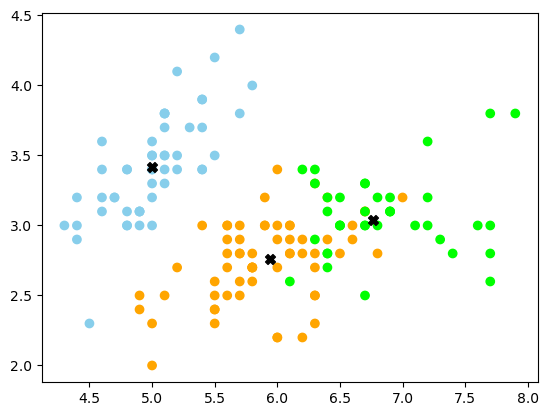

In [14]:
fig, ax = plt.subplots()
colormap = { 0:"skyblue", 1:"orange", 2:"lime"}
ax.scatter(x="SepalLengthCm", y="SepalWidthCm", data=total_data, c=total_data["Species"].map(colormap))
ax.scatter(x="SepalLengthCm", y="SepalWidthCm", data=centroid_df, c="Black", marker="X", s=50)
plt.show()

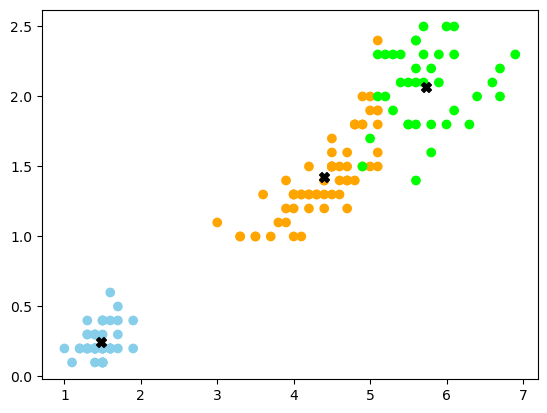

In [15]:
fig, ax = plt.subplots()
colormap = { 0:"skyblue", 1:"orange", 2:"lime"}
ax.scatter(x="PetalLengthCm", y="PetalWidthCm", data=total_data, c=total_data["Species"].map(colormap))
ax.scatter(x="PetalLengthCm", y="PetalWidthCm", data=centroid_df, c="black", marker="X", s=50)
plt.show()

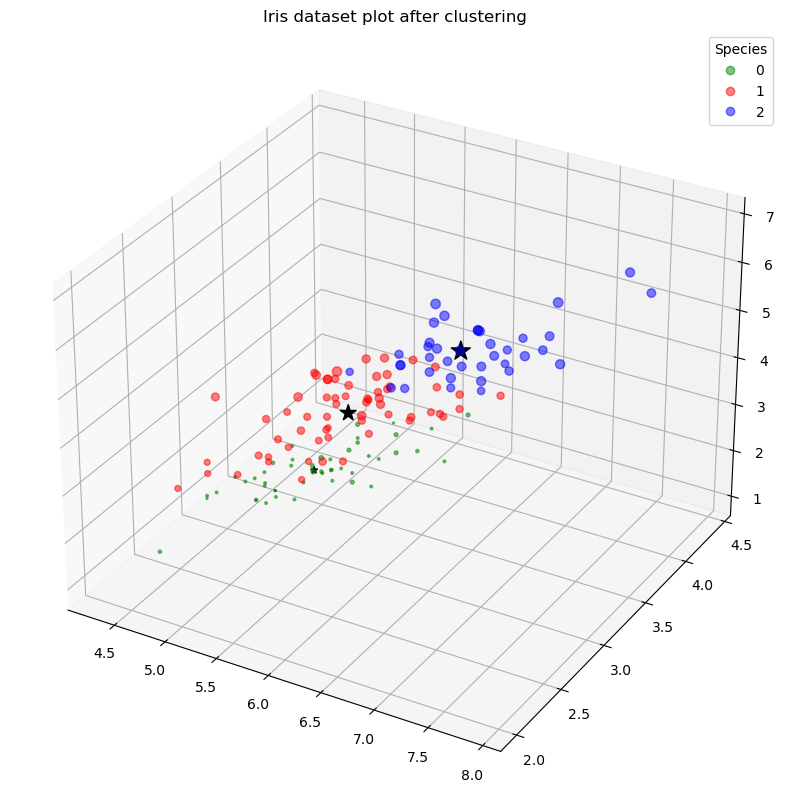

In [19]:
x_axis = np.array(total_data["SepalLengthCm"])
y_axis = np.array(total_data["SepalWidthCm"])
z_axis = np.array(total_data["PetalLengthCm"])
s = np.array(total_data["PetalWidthCm"])
labels = np.array(total_data["Species"])
colors = ["green", "red", "blue"]
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
scatter = ax.scatter3D(x_axis, y_axis, z_axis, s=s*75, c=labels, cmap=mpl.colors.ListedColormap(colors), marker=".", alpha=0.5)
centroid_x = np.array(centroid_df["SepalLengthCm"])
centroid_y = np.array(centroid_df["SepalWidthCm"])
centroid_z = np.array(centroid_df["PetalLengthCm"])
centroid_s = np.array(centroid_df["PetalWidthCm"])
ax.scatter3D(centroid_x, centroid_y, centroid_z, s=centroid_s*100, c="Black", marker="*", alpha=1)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Species")
plt.title("Iris dataset plot after clustering");